Sin autoarima

📉 Prueba ADF
→ ADF Statistic: 0.2598
→ p-value: 0.9754


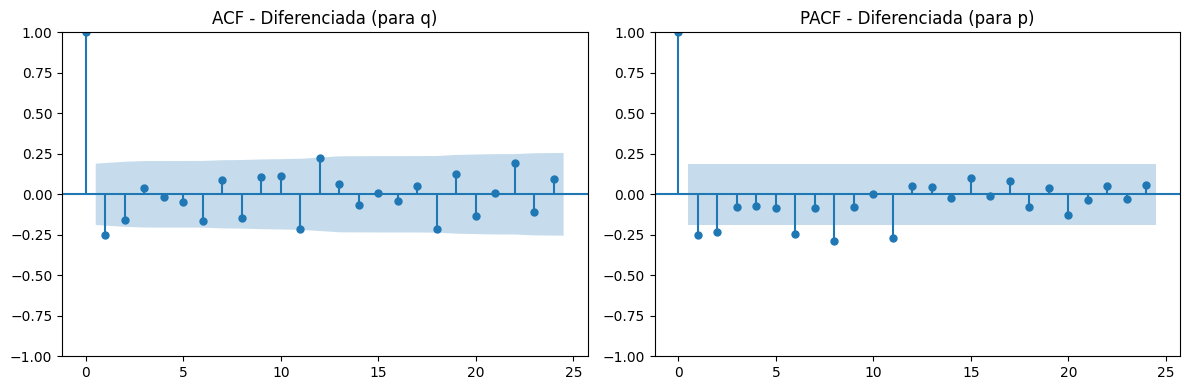

📌 Parámetros seleccionados manualmente: ARIMA(1,1,1)
📊 MÉTRICAS ARIMA – MANUAL – PREDICCIÓN 2023
✅ MAE  : 108.79 GWh
✅ RMSE : 123.03 GWh
✅ MAPE : 5.43 %
✅ R²   : -3.7768


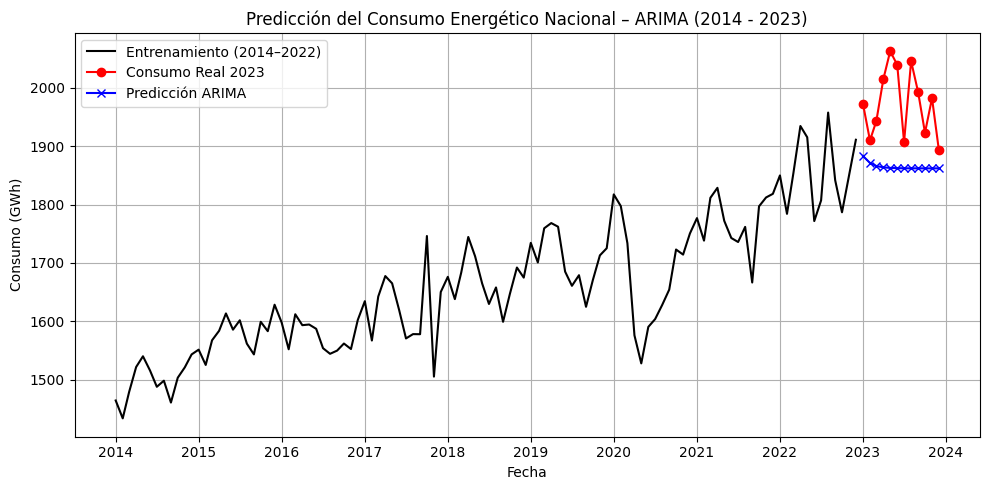

In [ ]:
# === LIBRERÍAS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# === 1. CARGAR Y LIMPIAR DATOS ===
df = pd.read_csv("df_estadistico.csv", parse_dates=["Fecha"])
df = df[(df["Fecha"] >= "2014-01-01") & (df["Fecha"] <= "2023-12-31")]
df = df[df["Energia_GWh"] >= 0]
df.set_index("Fecha", inplace=True)
df_mensual = df["Energia_GWh"].resample("MS").sum().reset_index()

# === 2. DIVIDIR TRAIN Y TEST (test = 2023) ===
cutoff_date = "2022-12-01"
train = df_mensual[df_mensual["Fecha"] <= cutoff_date].copy()
test = df_mensual[df_mensual["Fecha"] > cutoff_date].copy()
train.set_index("Fecha", inplace=True)

# === 3. TEST ADF PARA EVALUAR ESTACIONARIEDAD ===
resultado_adf = adfuller(train["Energia_GWh"])
print("📉 Prueba ADF")
print(f"→ ADF Statistic: {resultado_adf[0]:.4f}")
print(f"→ p-value: {resultado_adf[1]:.4f}")
# Si p > 0.05 ⇒ no estacionaria ⇒ aplicar diferenciación

# === 4. DIFERENCIACIÓN Y GRÁFICOS ACF / PACF ===
serie_diferenciada = train["Energia_GWh"].diff().dropna()

# ACF (sugiere q), PACF (sugiere p)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(serie_diferenciada, ax=axes[0], lags=24)
plot_pacf(serie_diferenciada, ax=axes[1], lags=24, method="ywm")
axes[0].set_title("ACF - Diferenciada (para q)")
axes[1].set_title("PACF - Diferenciada (para p)")
plt.tight_layout()
plt.savefig("acf_pacf_arima_manual.png")
plt.show()

# Basado en ADF + gráficos, elige manualmente p, d, q:
# Por ejemplo (ajústalo según tus gráficos):
p, d, q = 1, 1, 1
print(f"📌 Parámetros seleccionados manualmente: ARIMA({p},{d},{q})")

# === 5. ENTRENAR MODELO ARIMA MANUAL ===
modelo = ARIMA(train["Energia_GWh"], order=(p, d, q))
modelo_fit = modelo.fit()

# === 6. PREDICCIONES PARA 2023 ===
pred = modelo_fit.forecast(steps=12)
df_pred = test.copy()
df_pred["Prediccion_GWh"] = pred.values

# === 7. MÉTRICAS DE EVALUACIÓN ===
mae = mean_absolute_error(df_pred["Energia_GWh"], df_pred["Prediccion_GWh"])
rmse = np.sqrt(mean_squared_error(df_pred["Energia_GWh"], df_pred["Prediccion_GWh"]))
mape = np.mean(np.abs((df_pred["Energia_GWh"] - df_pred["Prediccion_GWh"]) / df_pred["Energia_GWh"])) * 100
r2 = r2_score(df_pred["Energia_GWh"], df_pred["Prediccion_GWh"])

print("📊 MÉTRICAS ARIMA – MANUAL – PREDICCIÓN 2023")
print(f"✅ MAE  : {mae:.2f} GWh")
print(f"✅ RMSE : {rmse:.2f} GWh")
print(f"✅ MAPE : {mape:.2f} %")
print(f"✅ R²   : {r2:.4f}")

# === 8. GRÁFICO FINAL ===
plt.figure(figsize=(10,5))
plt.plot(train.index, train["Energia_GWh"], label="Entrenamiento (2014–2022)", color="black")
plt.plot(df_pred["Fecha"], df_pred["Energia_GWh"], label="Consumo Real 2023", marker='o', color="red")
plt.plot(df_pred["Fecha"], df_pred["Prediccion_GWh"], label="Predicción ARIMA", marker='x', color="blue")
plt.title("Predicción del Consumo Energético Nacional – ARIMA (2014 - 2023)")
plt.xlabel("Fecha")
plt.ylabel("Consumo (GWh)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("prediccion_arima_manual_2023.png")
plt.show()


📉 Prueba ADF
→ ADF Statistic: 1.1022
→ p-value: 0.9952


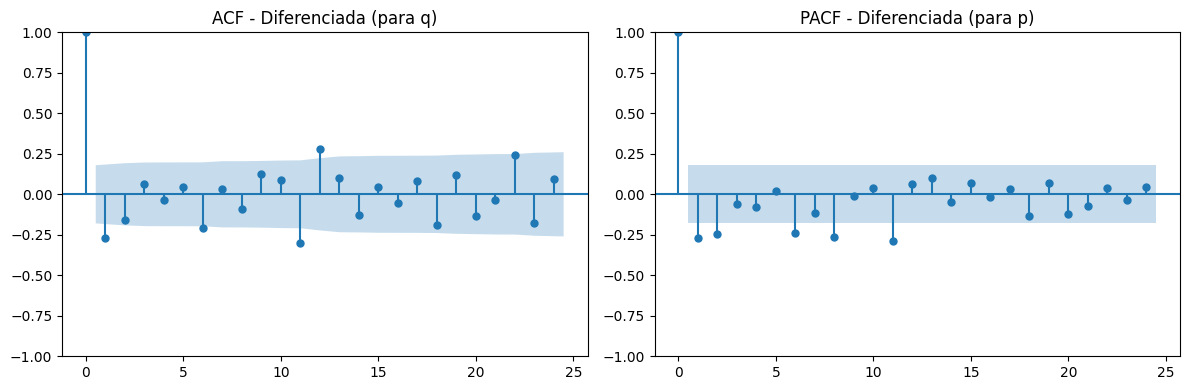

📌 Parámetros seleccionados manualmente: ARIMA(1,1,1)
📊 MÉTRICAS ARIMA – MANUAL – PREDICCIÓN 2023
✅ MAE  : 157.88 GWh
✅ RMSE : 181.99 GWh
✅ MAPE : 8.63 %
✅ R²   : -0.0330


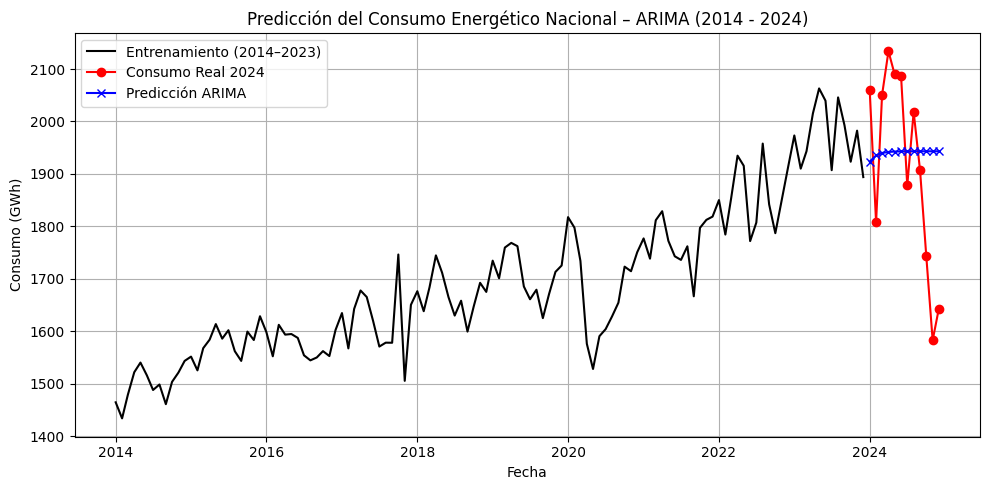

In [ ]:
# === LIBRERÍAS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# === 1. CARGAR Y LIMPIAR DATOS ===
df = pd.read_csv("df_estadistico.csv", parse_dates=["Fecha"])
df = df[(df["Fecha"] >= "2014-01-01") & (df["Fecha"] <= "2024-12-31")]
df = df[df["Energia_GWh"] >= 0]
df.set_index("Fecha", inplace=True)
df_mensual = df["Energia_GWh"].resample("MS").sum().reset_index()

# === 2. DIVIDIR TRAIN Y TEST (test = 2023) ===
cutoff_date = "2023-12-01"
train = df_mensual[df_mensual["Fecha"] <= cutoff_date].copy()
test = df_mensual[df_mensual["Fecha"] > cutoff_date].copy()
train.set_index("Fecha", inplace=True)

# === 3. TEST ADF PARA EVALUAR ESTACIONARIEDAD ===
resultado_adf = adfuller(train["Energia_GWh"])
print("📉 Prueba ADF")
print(f"→ ADF Statistic: {resultado_adf[0]:.4f}")
print(f"→ p-value: {resultado_adf[1]:.4f}")
# Si p > 0.05 ⇒ no estacionaria ⇒ aplicar diferenciación

# === 4. DIFERENCIACIÓN Y GRÁFICOS ACF / PACF ===
serie_diferenciada = train["Energia_GWh"].diff().dropna()

# ACF (sugiere q), PACF (sugiere p)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(serie_diferenciada, ax=axes[0], lags=24)
plot_pacf(serie_diferenciada, ax=axes[1], lags=24, method="ywm")
axes[0].set_title("ACF - Diferenciada (para q)")
axes[1].set_title("PACF - Diferenciada (para p)")
plt.tight_layout()
plt.savefig("acf_pacf_arima_manual.png")
plt.show()

# Basado en ADF + gráficos, elige manualmente p, d, q:
# Por ejemplo (ajústalo según tus gráficos):
p, d, q = 1, 1, 1
print(f"📌 Parámetros seleccionados manualmente: ARIMA({p},{d},{q})")

# === 5. ENTRENAR MODELO ARIMA MANUAL ===
modelo = ARIMA(train["Energia_GWh"], order=(p, d, q))
modelo_fit = modelo.fit()

# === 6. PREDICCIONES PARA 2023 ===
pred = modelo_fit.forecast(steps=12)
df_pred = test.copy()
df_pred["Prediccion_GWh"] = pred.values

# === 7. MÉTRICAS DE EVALUACIÓN ===
mae = mean_absolute_error(df_pred["Energia_GWh"], df_pred["Prediccion_GWh"])
rmse = np.sqrt(mean_squared_error(df_pred["Energia_GWh"], df_pred["Prediccion_GWh"]))
mape = np.mean(np.abs((df_pred["Energia_GWh"] - df_pred["Prediccion_GWh"]) / df_pred["Energia_GWh"])) * 100
r2 = r2_score(df_pred["Energia_GWh"], df_pred["Prediccion_GWh"])

print("📊 MÉTRICAS ARIMA – MANUAL – PREDICCIÓN 2023")
print(f"✅ MAE  : {mae:.2f} GWh")
print(f"✅ RMSE : {rmse:.2f} GWh")
print(f"✅ MAPE : {mape:.2f} %")
print(f"✅ R²   : {r2:.4f}")

# === 8. GRÁFICO FINAL ===
plt.figure(figsize=(10,5))
plt.plot(train.index, train["Energia_GWh"], label="Entrenamiento (2014–2023)", color="black")
plt.plot(df_pred["Fecha"], df_pred["Energia_GWh"], label="Consumo Real 2024", marker='o', color="red")
plt.plot(df_pred["Fecha"], df_pred["Prediccion_GWh"], label="Predicción ARIMA", marker='x', color="blue")
plt.title("Predicción del Consumo Energético Nacional – ARIMA (2014 - 2024)")
plt.xlabel("Fecha")
plt.ylabel("Consumo (GWh)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("prediccion_arima_manual_2023.png")
plt.show()
